# EDA - Analyse exploratoire de données en Python

## 1. Charger les bibliothèques nécessaires

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
from sklearn.preprocessing import LabelEncoder
wr.filterwarnings('ignore')

## 2. Charger le CSV

In [14]:
df = pd.read_csv("data/train_with_id.csv")
print(df.head())

   ID  Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   1   60  Female      Yes         No                Yes      Yes         No   
1   2   85    Male      Yes        Yes                Yes      Yes        Yes   
2   3   48    Male      Yes        Yes                Yes       No        Yes   
3   4   41    Male      Yes        Yes                Yes      Yes        Yes   
4   5   57    Male       No         No                 No       No        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0            Yes             Yes     Yes           No             Yes   
1            Yes             Yes     Yes           No             Yes   
2            Yes              No      No           No             Yes   
3            Yes             Yes     Yes          Yes              No   
4             No             Yes      No           No              No   

  partial paresis muscle stiffness Alopecia Obesity     class  
0         

## 3. Analyse des données

In [15]:
df.shape
df.info()
df.describe().T
df.columns.tolist()
df = df.drop('ID', axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  416 non-null    int64 
 1   Age                 416 non-null    int64 
 2   Gender              416 non-null    object
 3   Polyuria            416 non-null    object
 4   Polydipsia          416 non-null    object
 5   sudden weight loss  416 non-null    object
 6   weakness            416 non-null    object
 7   Polyphagia          416 non-null    object
 8   Genital thrush      416 non-null    object
 9   visual blurring     416 non-null    object
 10  Itching             416 non-null    object
 11  Irritability        416 non-null    object
 12  delayed healing     416 non-null    object
 13  partial paresis     416 non-null    object
 14  muscle stiffness    416 non-null    object
 15  Alopecia            416 non-null    object
 16  Obesity             416 no

## 4. Vérification des valeurs manquantes

In [16]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

## 5. Vérification des valeurs en double

In [17]:
df.nunique()

Age                   51
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64

## 6.visualisation des données

#### Distribution de la variable cible 'class'

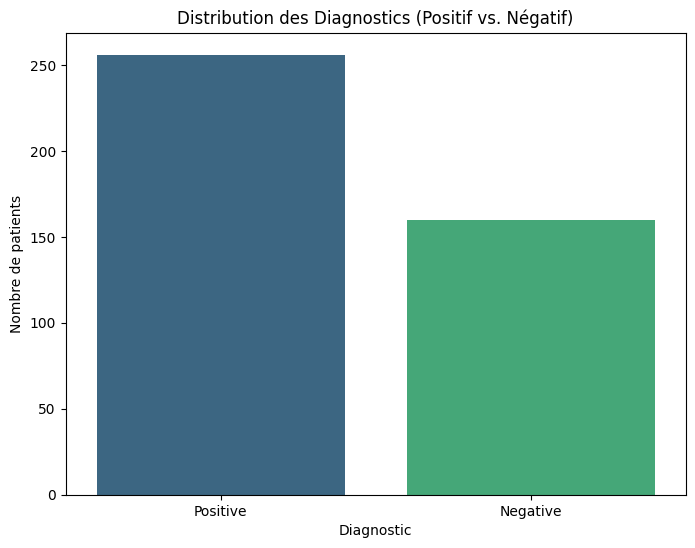

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df, palette='viridis')
plt.title('Distribution des Diagnostics (Positif vs. Négatif)')
plt.xlabel('Diagnostic')
plt.ylabel('Nombre de patients')
plt.show()

"On observe un léger déséquilibre des classes, avec plus de cas positifs."

##### Distribution de l'âge en fonction du diagnostic

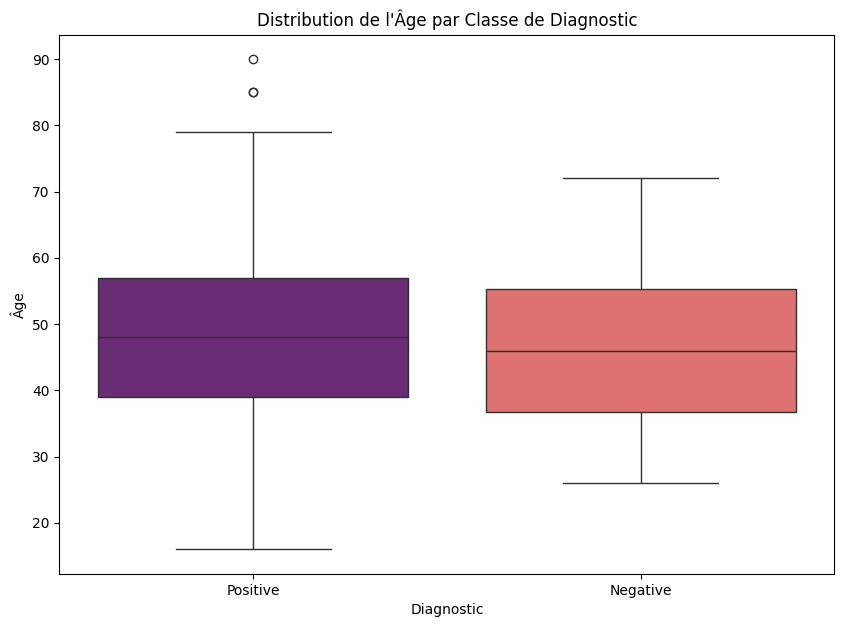

In [19]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='class', y='Age', data=df, palette='magma')
plt.title('Distribution de l\'Âge par Classe de Diagnostic')
plt.xlabel('Diagnostic')
plt.ylabel('Âge')
plt.show()

#### Analyse des variables catégorielles
#### On prend toutes les colonnes sauf 'Age' et 'class'

In [20]:
categorical_features = [col for col in df.columns if col not in ['Age', 'class']]

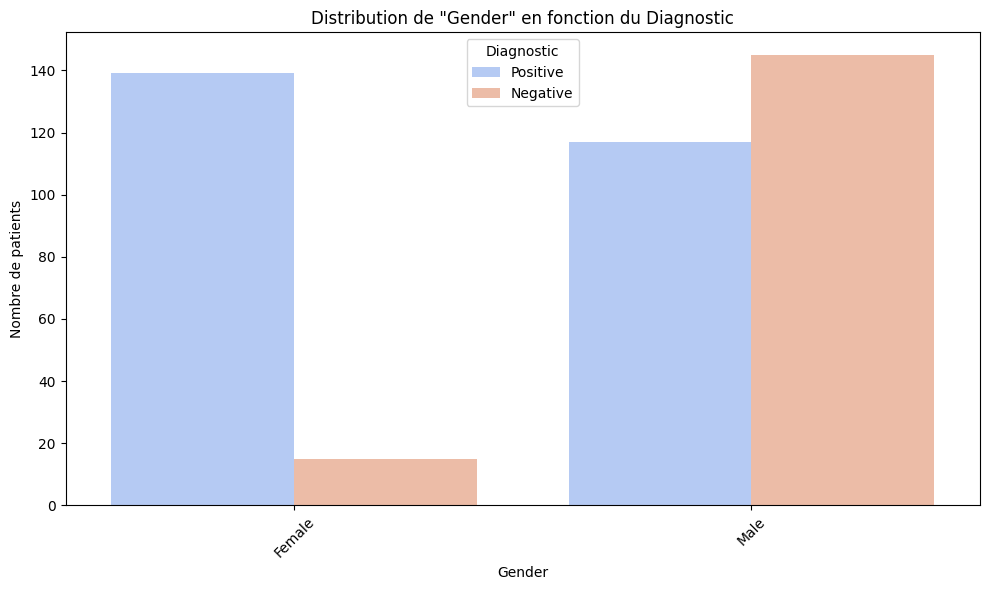

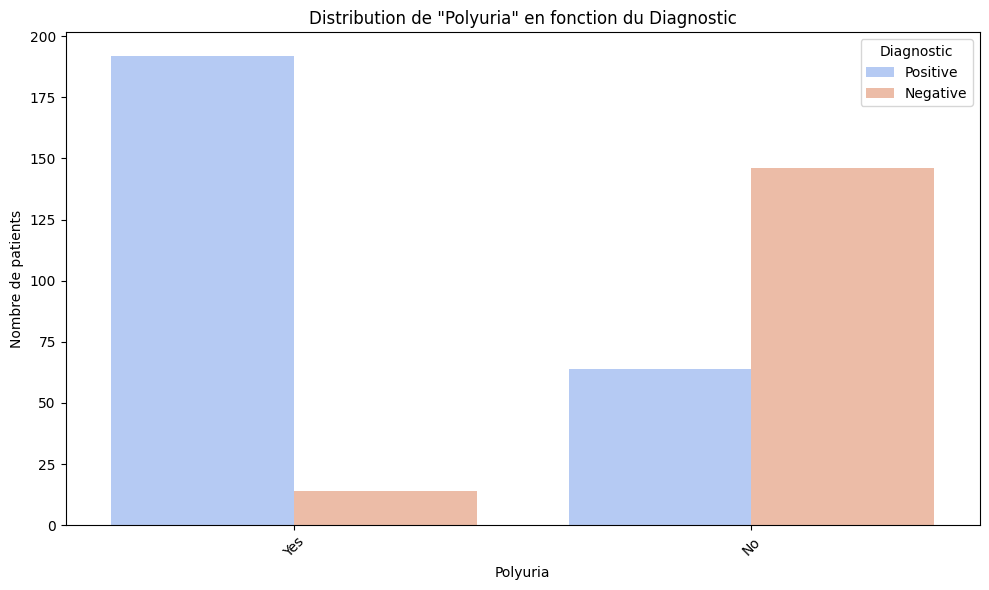

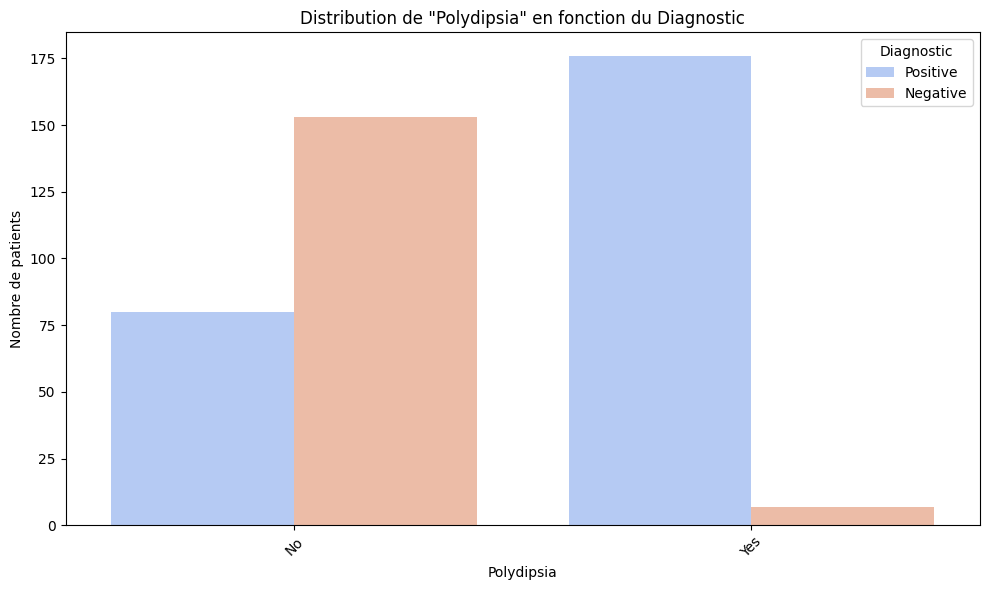

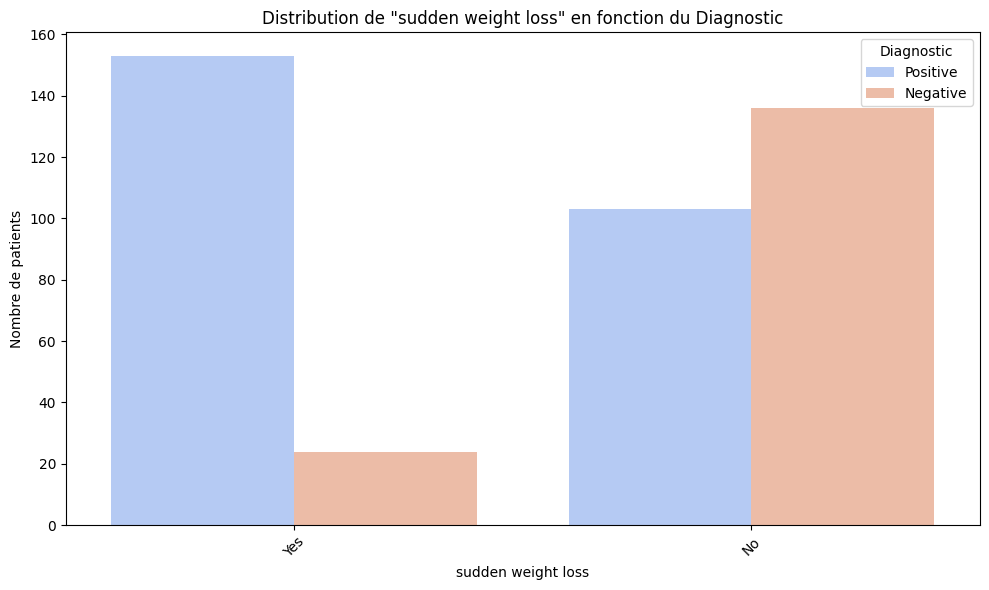

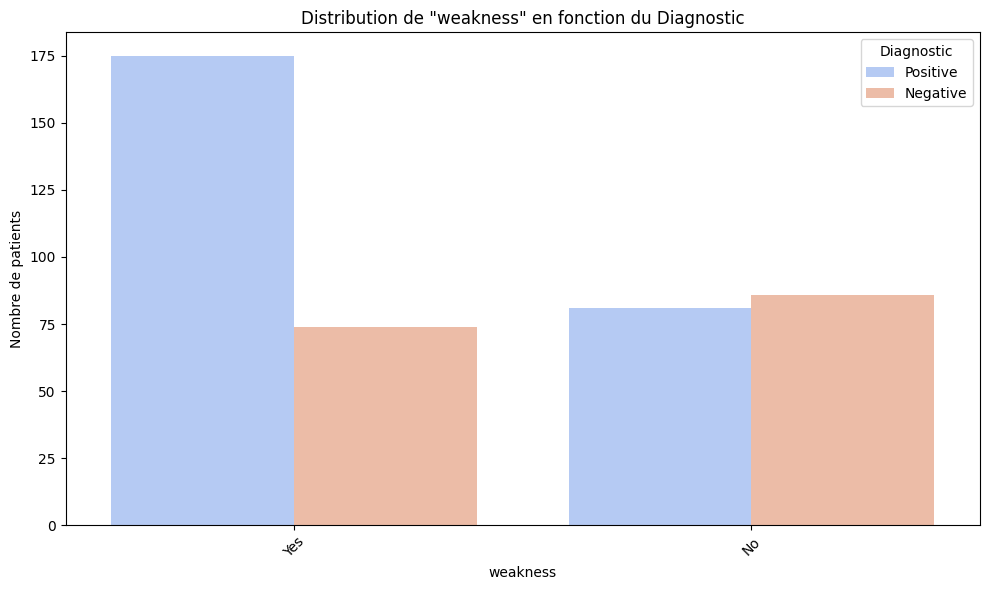

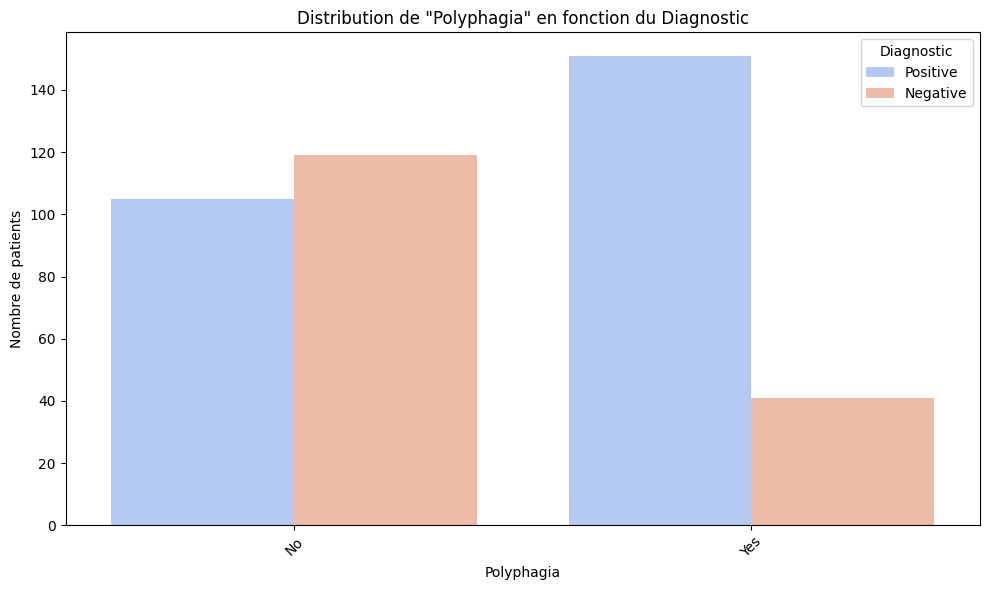

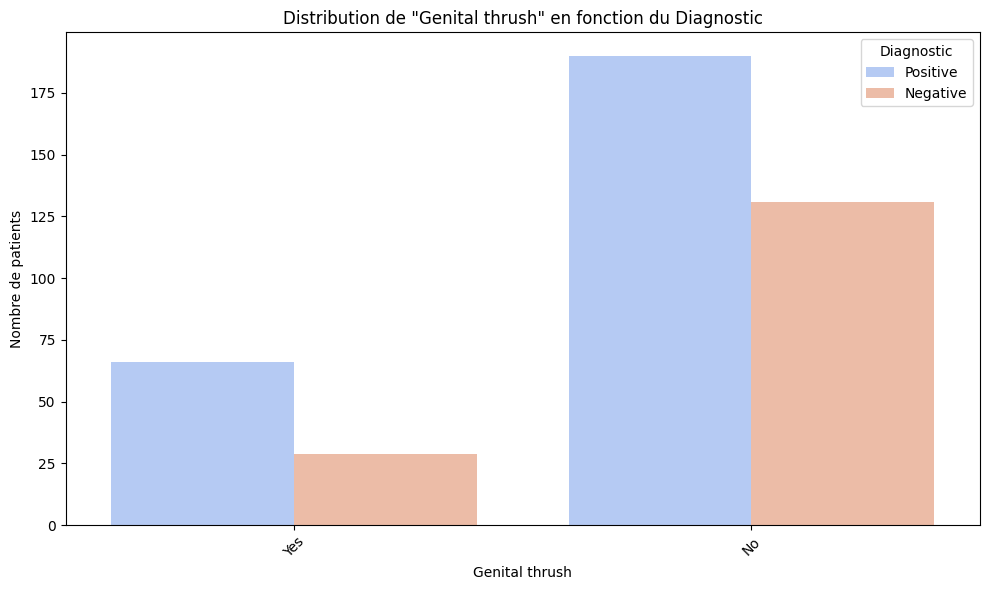

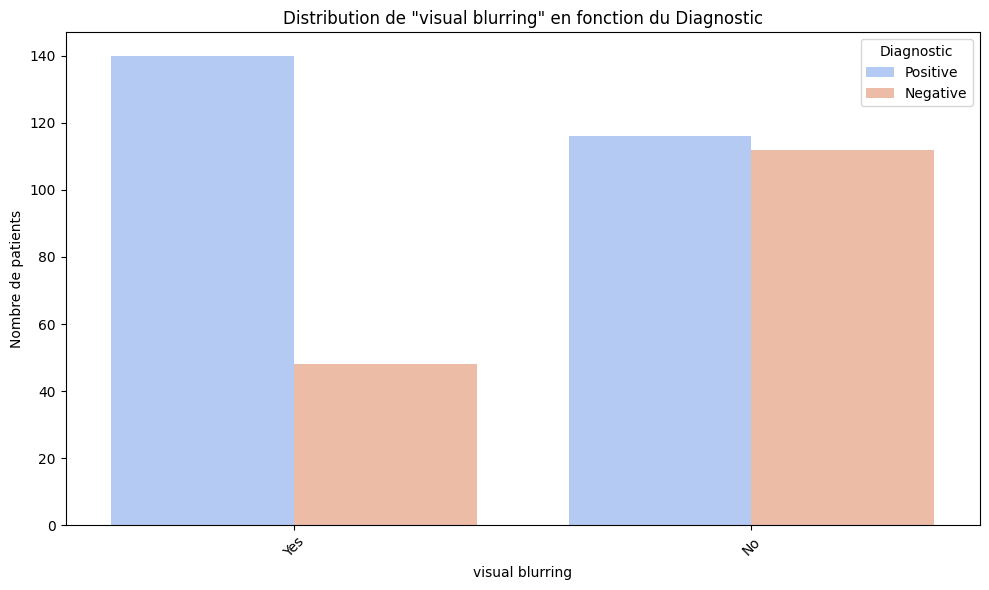

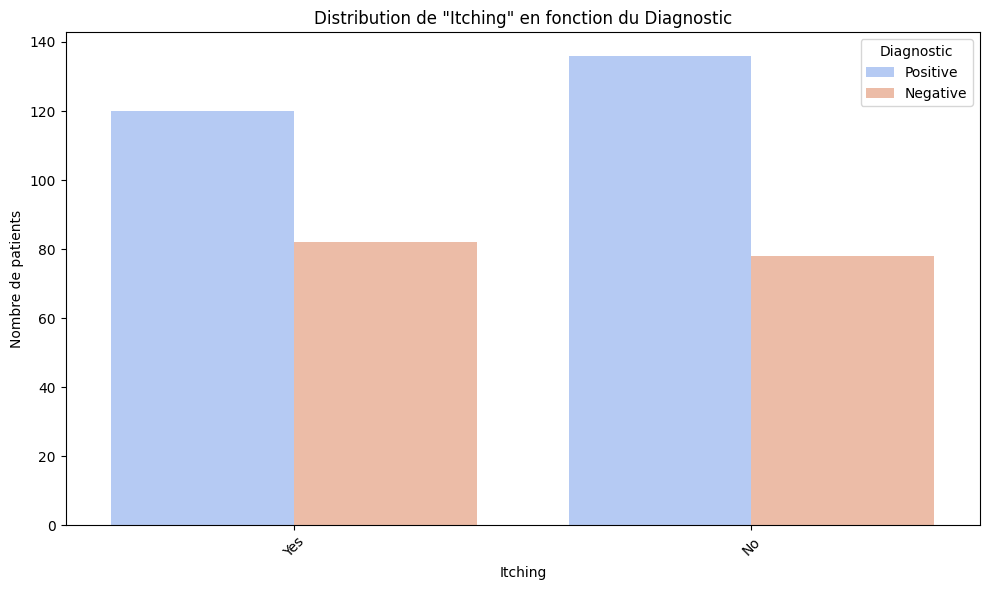

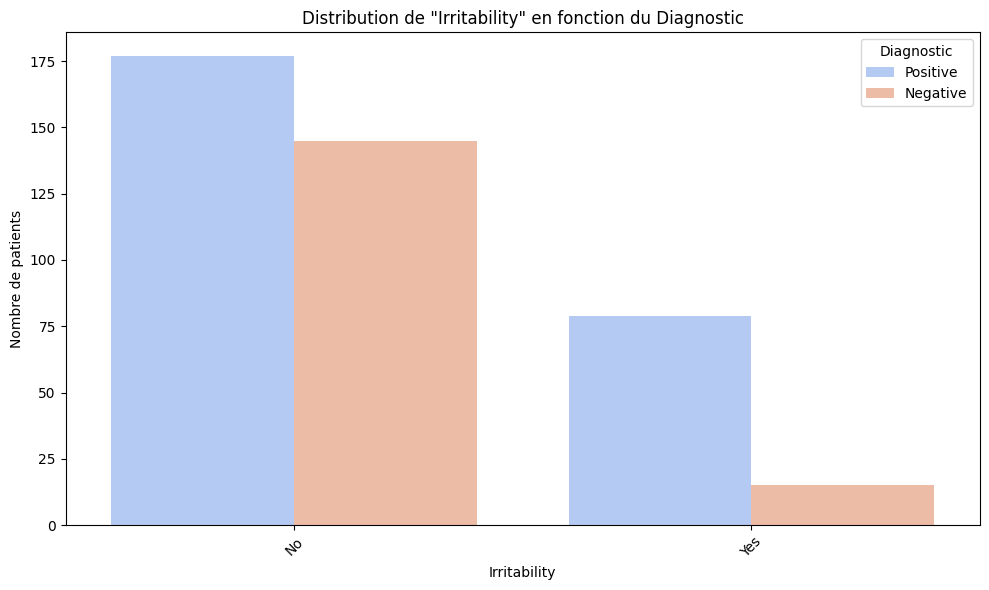

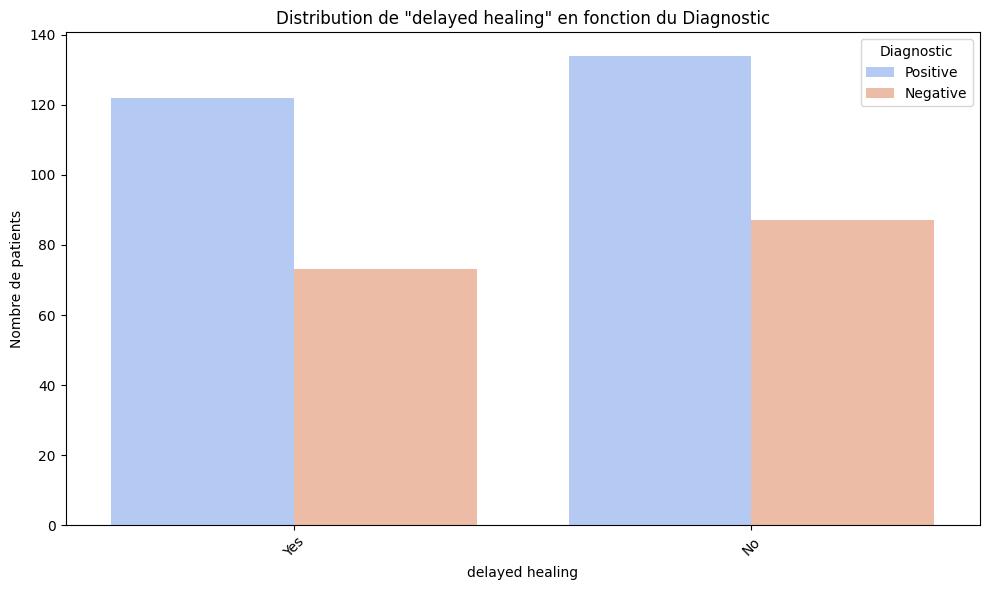

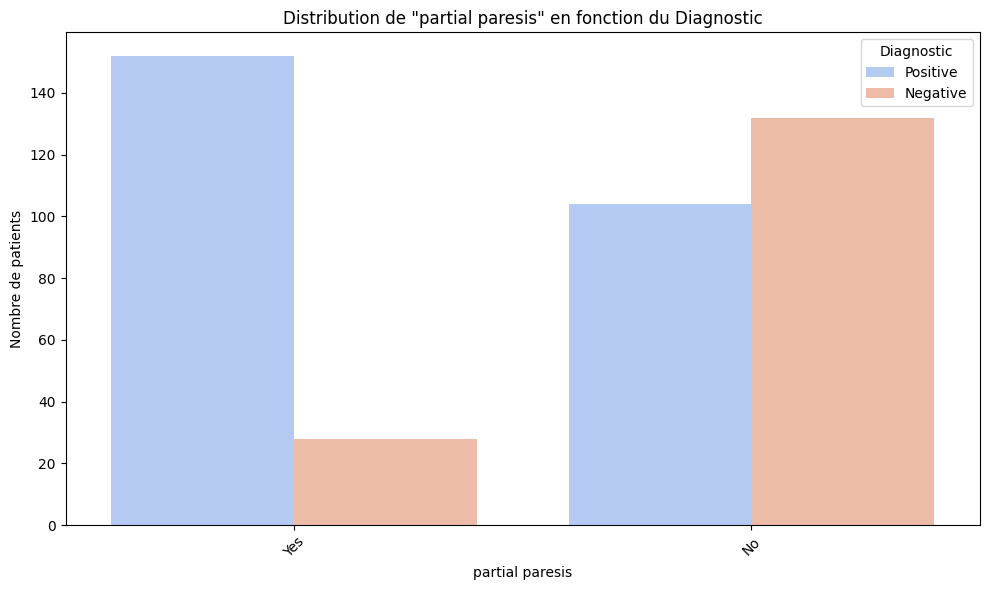

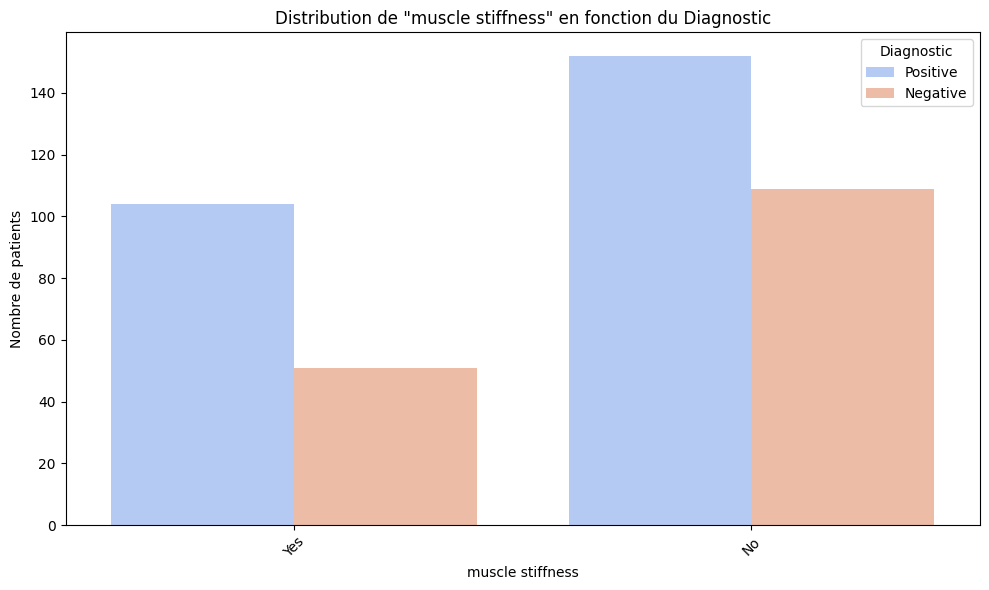

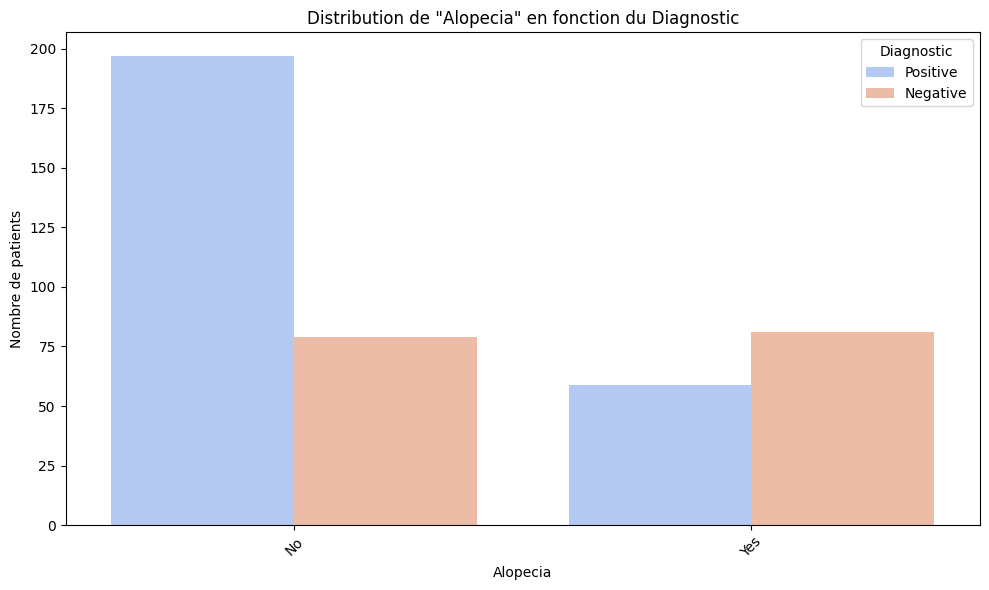

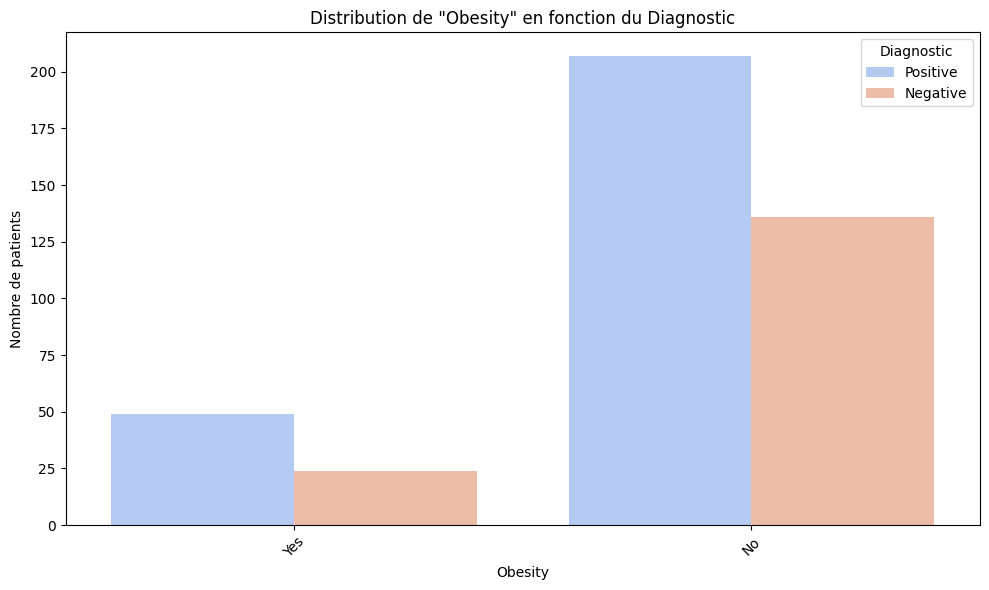

In [21]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='class', data=df, palette='coolwarm')
    plt.title(f'Distribution de "{feature}" en fonction du Diagnostic')
    plt.xlabel(feature)
    plt.ylabel('Nombre de patients')
    plt.xticks(rotation=45)
    plt.legend(title='Diagnostic')
    plt.tight_layout()
    plt.show()


"les symptômes **Polyuria** (uriner fréquemment) et **Polydipsia** (soif excessive) semblent être des indicateurs très forts d'un diagnostic positif."

## 7. Préparation des données pour la modélisation et le fichier clean"

In [22]:
print("\n--- Étape 4: Encodage des données pour la corrélation ---")
# Copier le dataframe pour ne pas modifier l'original nettoyé
df_encoded = df.copy()

# Utiliser LabelEncoder pour convertir toutes les colonnes de type 'object' en nombres
# Cela transforme les catégories (Oui/Non, Homme/Femme, etc.) en 0 et 1.
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])
        # Afficher le mapping pour comprendre l'encodage
        print(f"Mapping pour '{column}': {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\nAperçu des données encodées numériquement :")
print(df_encoded.head())


--- Étape 4: Encodage des données pour la corrélation ---
Mapping pour 'Gender': {'Female': np.int64(0), 'Male': np.int64(1)}
Mapping pour 'Polyuria': {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping pour 'Polydipsia': {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping pour 'sudden weight loss': {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping pour 'weakness': {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping pour 'Polyphagia': {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping pour 'Genital thrush': {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping pour 'visual blurring': {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping pour 'Itching': {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping pour 'Irritability': {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping pour 'delayed healing': {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping pour 'partial paresis': {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping pour 'muscle stiffness': {'No': np.int64(0), 'Yes': np.int64(1)}
Mapping pour 'Alopecia': {'No': np.int64(

## 8. Matrice de corrélation


--- Création de la matrice de corrélation ---

Classement des FORCES de corrélation (Valeur Absolue) avec 'class' :
Polyuria              0.644648
Polydipsia            0.630948
Gender                0.452613
sudden weight loss    0.440493
partial paresis       0.411190
Polyphagia            0.325554
Alopecia              0.283940
Irritability          0.249926
visual blurring       0.241330
weakness              0.219431
Genital thrush        0.088732
Age                   0.088540
muscle stiffness      0.088044
Obesity               0.052959
Itching               0.042587
delayed healing       0.019803
Name: class, dtype: float64


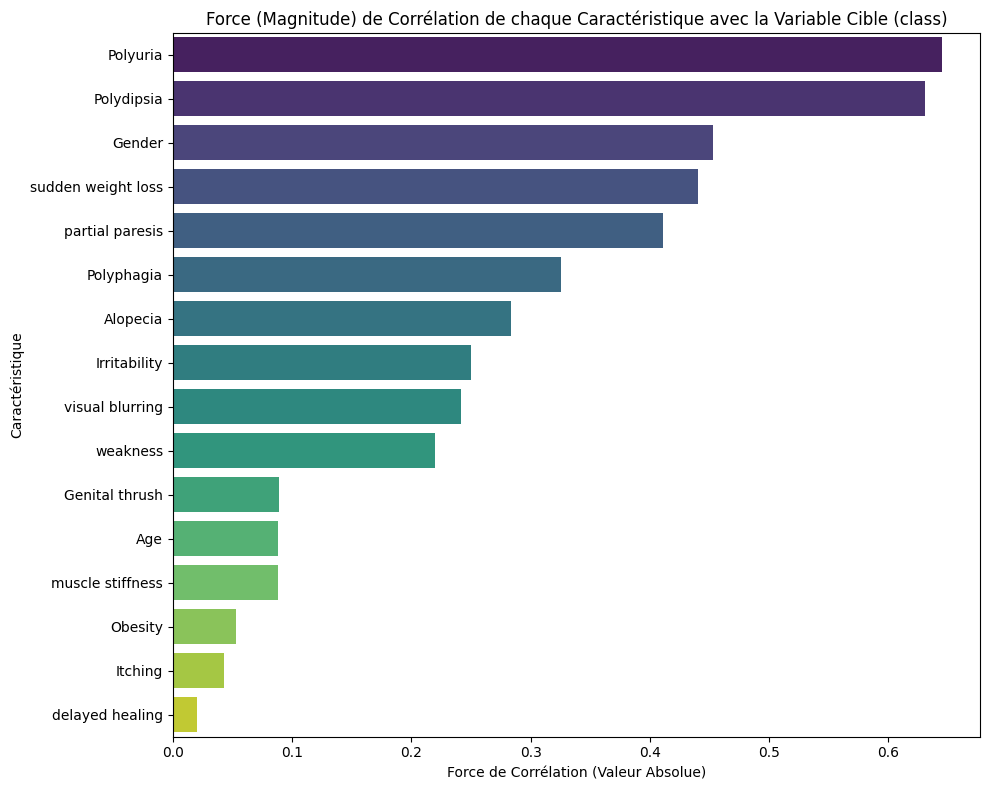

In [23]:
print("\n--- Création de la matrice de corrélation ---")
# Calculer la matrice de corrélation
corr_matrix = df_encoded.corr()

# 2. SÉLECTIONNER LA COLONNE 'class' ET PRENDRE LA VALEUR ABSOLUE (Le changement principal)
# Ceci nous donne la force de la relation, sans tenir compte de la direction.
class_correlations_abs = corr_matrix['class'].abs().sort_values(ascending=False)

# 3. Supprimer la corrélation de 'class' avec elle-même (qui est toujours 1)
class_correlations_abs = class_correlations_abs.drop('class')

# 4. Afficher les résultats sous forme de tableau
print("\nClassement des FORCES de corrélation (Valeur Absolue) avec 'class' :")
print(class_correlations_abs)

# 5. Visualiser les corrélations avec un graphique à barres (uniquement positives)
plt.figure(figsize=(10, 8))
# Nous utilisons la série avec les valeurs absolues (uniquement positives)
sns.barplot(x=class_correlations_abs.values, 
            y=class_correlations_abs.index, 
            palette='viridis') # La palette affiche toutes les barres en couleur positive
plt.title('Force (Magnitude) de Corrélation de chaque Caractéristique avec la Variable Cible (class)')
plt.xlabel('Force de Corrélation (Valeur Absolue)')
plt.ylabel('Caractéristique')
plt.tight_layout()
plt.show()

## 9. Création du fichier 'diabetes_clean.csv

In [24]:
print("\n--- Création du fichier 'diabetes_clean.csv' ---")
output_filename = 'diabetes_clean.csv'

# Sauvegarder le DataFrame encodé dans un nouveau fichier CSV, sans l'index.
df_encoded.to_csv(output_filename, index=False)

print(f"Le fichier '{output_filename}' a été créé avec succès.")
print("\n--- FIN DU SCRIPT ---")


--- Création du fichier 'diabetes_clean.csv' ---
Le fichier 'diabetes_clean.csv' a été créé avec succès.

--- FIN DU SCRIPT ---
